<a href="https://colab.research.google.com/github/devchand18/CODSOFTTASK1/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
import pandas as pd

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first 5 rows of the training set
train.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [3]:
# Check structure and types
train.info()


NameError: name 'train' is not defined

In [ ]:
# Count missing values per column
train.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Summary of numeric columns
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check unique values in key columns
print("Sex:", train['Sex'].unique())
print("Embarked:", train['Embarked'].unique())
print("Pclass:", train['Pclass'].unique())


Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]


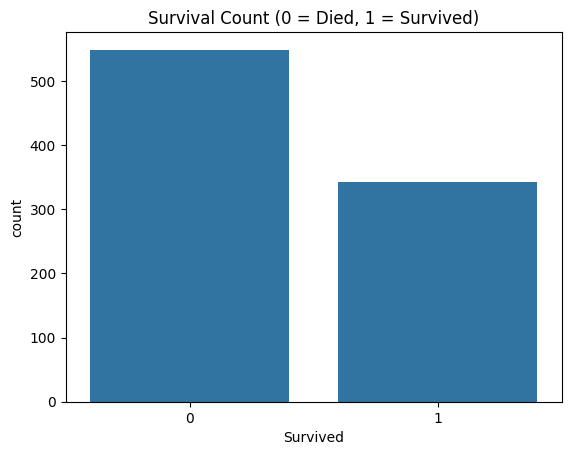

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

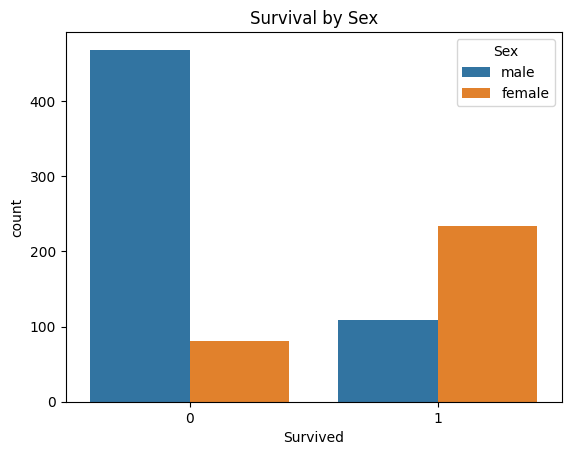

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Sex')
plt.show()


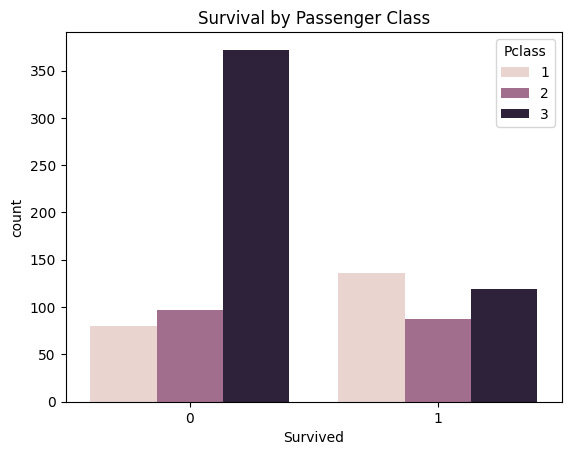

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Passenger Class')
plt.show()


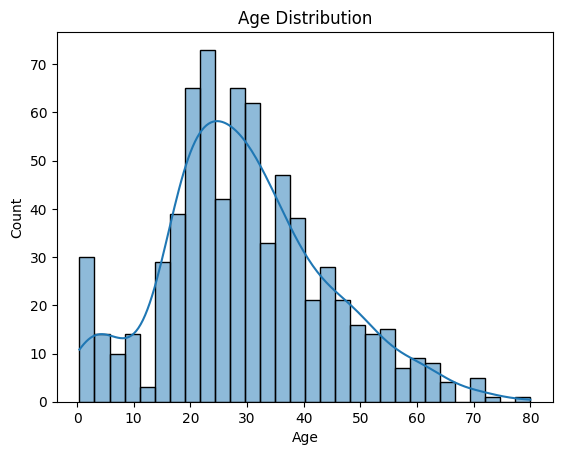

In [ ]:
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


In [ ]:
train.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)


In [ ]:
# Fill missing values (safe and recommended way)
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])


In [ ]:
# Define input features and target variable
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']


In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Unique in train['Sex']:", train['Sex'].unique())
print("Unique in test['Sex']:", test['Sex'].unique())

print("Unique in train['Embarked']:", train['Embarked'].unique())
print("Unique in test['Embarked']:", test['Embarked'].unique())


Unique in train['Sex']: ['male' 'female']
Unique in test['Sex']: ['male' 'female']
Unique in train['Embarked']: ['S' 'C' 'Q']
Unique in test['Embarked']: ['Q' 'S' 'C']


In [ ]:
# Convert 'Sex': male = 0, female = 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked': S = 0, C = 1, Q = 2
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [ ]:
print("Train Sex:", train['Sex'].unique())
print("Test Sex:", test['Sex'].unique())

print("Train Embarked:", train['Embarked'].unique())
print("Test Embarked:", test['Embarked'].unique())


Train Sex: [0 1]
Test Sex: [0 1]
Train Embarked: [0 1 2]
Test Embarked: [2 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


Validation Accuracy: 0.80


In [ ]:
# Remove PassengerId from test data before prediction
X_test = test.drop(['PassengerId'], axis=1)

# Predict survival on test data
test_predictions = model.predict(X_test)


In [ ]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)


In [ ]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>